# <center> Applications du Bootstrap : TP2 régression

Antoine Grelety

Vincent Le Meur

In [1]:
import numpy as np
import numpy.random as npr
import pandas as pd
import math
import scipy as sc
from scipy.stats import norm
import statsmodels.genmod.generalized_linear_model as st
from matplotlib import pyplot as plt

In [2]:
import resampling

## Importation des données

In [3]:
cars = pd.read_csv("mtcars.csv")
cars["intercept"]=np.ones(len(cars))
urine = pd.read_csv("urine.dat",sep="\t")
#urine["intercept"]=np.ones(len(urine))
urine=urine.fillna(np.mean(urine))

In [4]:
cars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,intercept
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1.0
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1.0
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1.0
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1.0
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1.0


In [5]:
urine.head()

,r,gravity,ph,osmo,cond,urea,calc
0,0,1.021,4.91,725.0,20.901282,443,2.45
1,0,1.017,5.74,577.0,20.000000,296,4.49
2,0,1.008,7.20,321.0,14.900000,101,2.36
3,0,1.011,5.51,408.0,12.600000,224,2.15
4,0,1.005,6.52,187.0,7.500000,91,1.16


In [6]:
X_cars = np.array(cars.drop(["mpg","model"],axis=1))
y_cars = np.array(cars.iloc[:,1])

In [7]:
X_urine = np.array(urine.drop("r",axis=1))
y_urine = np.array(urine.iloc[:,0])

In [8]:
Res_lin = resampling.Res(X=X_cars,y=y_cars,method="linear",alpha=0.05,B=100)
Res_log = resampling.Res(X=X_urine,y=y_urine,method="logistic",alpha=0.05,B=100)

## Estimateurs classiques

### Estimation de Y=mpg dans le dataset mtcars via une régression linéaire

In [18]:
Res_lin.results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                   32
Model:                            GLM   Df Residuals:                       21
Model Family:                Gaussian   Df Model:                           10
Link Function:               identity   Scale:                   7.02354428651
Method:                          IRLS   Log-Likelihood:                -69.855
Date:                Mon, 19 Mar 2018   Deviance:                       147.49
Time:                        15:16:14   Pearson chi2:                     147.
No. Iterations:                     2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1114      1.045     -0.107      0.915      -2.160       1.937
x2             0.0133      0.018      0.747      0.455      -0.022       0.048
x3            -0.0215      0.022     -0.987      0.324      -0.064       0.021
x4             0.7871      1.635      0.481      0.630      -2.418       3.992
x5            -3.7153      1.894     -1.961      0.050      -7.428      -0.002
x6             0.8210      0.731      1.123      0.261      -0.611       2.253
x7             0.3178      2.105      0.151      0.880      -3.807       4.443
x8             2.5202      2.057      1.225      0.220      -1.511       6.551
x9             0.6554      1.493      0.439      0.661      -2.271       3.582
x10           -0.1994      0.829     -0.241      0.810      -1.824       1.425
const         12.3034     18.718      0.657      0.511     -24.383      48.990
==============================================================================
"""

In [21]:
Res_lin.results.pvalues

array([ 0.9150752 ,  0.45520936,  0.32372076,  0.63030073,  0.04985701,
        0.26126201,  0.87998246,  0.22042321,  0.6607237 ,  0.80984513,
        0.5109843 ])

In [12]:
Res_log.results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                   79
Model:                            GLM   Df Residuals:                       73
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -34.461
Date:                Mon, 19 Mar 2018   Deviance:                       68.921
Time:                        14:05:35   Pearson chi2:                     92.0
No. Iterations:                     6                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9611      3.095      0.310      0.756      -5.106       7.028
x2            -0.3806      0.477     -0.798      0.425      -1.316       0.555
x3             0.0238      0.009      2.525      0.012       0.005       0.042
x4            -0.4531      0.156     -2.909      0.004      -0.758      -0.148
x5            -0.0250      0.011     -2.340      0.019      -0.046      -0.004
x6             0.6669      0.188      3.546      0.000       0.298       1.036
==============================================================================
"""

## Intervalles de confiance par bootstrap

### Dataset cars :

In [13]:
#liste des beta bootstrapés pour Error Sampling et Case Sampling
CS_beta = Res_lin.case_sampling()
ES_beta = Res_lin.errors_sampling()

In [14]:
IC_base_ES=Res_lin.IC_base(Res_lin.beta,ES_beta)
IC_perc_ES=Res_lin.IC_perc(Res_lin.beta,ES_beta)
IC_base_CS=Res_lin.IC_base(Res_lin.beta,CS_beta)
IC_perc_CS=Res_lin.IC_perc(Res_lin.beta,CS_beta)
ICAN_plot = Res_lin.ICAN()

Comparons à présent les différents intervalles de confiance pour le dataset mtcars :

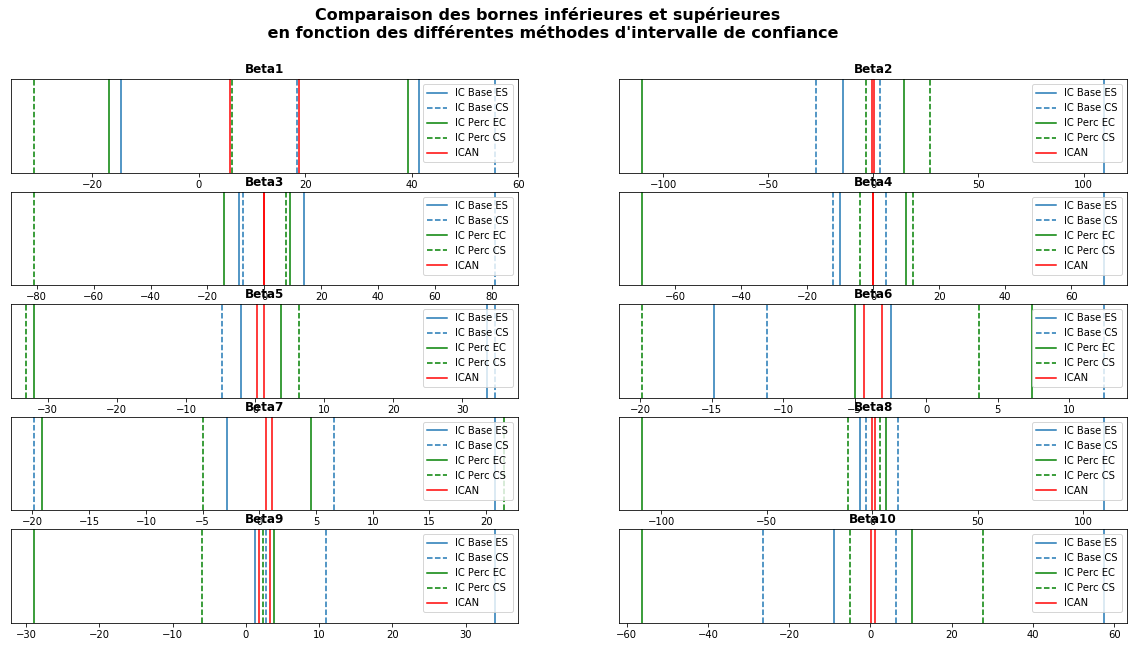

In [15]:
# A RAJOUTER: CASE SAMPLING AVEC DASH LINE
fig=plt.figure(figsize=(20,10))
plt.suptitle("Comparaison des bornes inférieures et supérieures \n en fonction des différentes méthodes d'intervalle de confiance",
           fontweight='bold',size=16)

for i in range(X_cars.shape[1]-1):
    ax=fig.add_subplot(5,2,i+1)
    #base ES
    base_ES=ax.axvline(IC_base_ES[i-1][0] ,label="IC Base ES")
    base_ES=ax.axvline(IC_base_ES[i-1][1] ,label="IC Base ES")
    #base CS
    base_CS=ax.axvline(IC_base_CS[i-1][0] ,label="IC Base CS",linestyle='dashed')
    base_CS=ax.axvline(IC_base_CS[i-1][1] ,label="IC Base CS",linestyle='dashed')
    #percentile ES
    perc_ES=ax.axvline(IC_perc_ES[i-1][0] ,color='green',label="IC Perc EC")
    perc_ES=ax.axvline(IC_perc_ES[i-1][1] ,color='green',label="IC Perc EC")
    #percentile CS
    perc_CS=ax.axvline(IC_perc_CS[i-1][0] ,color='green',label="IC Perc CS",linestyle='dashed')
    perc_CS=ax.axvline(IC_perc_CS[i-1][1] ,color='green',label="IC Perc CS",linestyle='dashed')
    #ICAN
    ican=ax.axvline(ICAN_plot[i-1][0],color='red',label="ICAN")
    ican=ax.axvline(ICAN_plot[i-1][1],color='red',label="ICAN")
    plt.title("Beta"+str(i+1),fontweight='bold')
    plt.yticks([])
    plt.legend(handles=[base_ES,base_CS,perc_ES,perc_CS,ican])

plt.show()

### Dataset urine : 

On constate que l'intervalle de confiance Asymptotique Normal semble très souvent plus performant que les IC Percentile et basique. La différence de performance entre les modèles error sampling et Case sampling sont relativement différente en fonction du paramètre choisis de même entre les IC percentile et basique

Comparons à présent la même chose pour le dataset urine :

In [16]:
#liste des beta bootstrapés pour Error Sampling et Case Sampling
CS_beta = Res_log.case_sampling()
ES_beta = Res_log.errors_sampling()

/Users/antoinegrelety/Documents/ENSAE/S2_Bootstrap/Bootstrap-resampling-methods/resampling.py:96: RuntimeWarning: invalid value encountered in sqrt
  cutoff = pi_logreg / ( 1 + pi_logreg ) + np.sqrt(pi_logreg*(1-pi_logreg))*sample_resid[i]


In [17]:
IC_base_ES=Res_log.IC_base(Res_log.beta,ES_beta)
IC_perc_ES=Res_log.IC_perc(Res_log.beta,ES_beta)
IC_base_CS=Res_log.IC_base(Res_log.beta,CS_beta)
IC_perc_CS=Res_log.IC_perc(Res_log.beta,CS_beta)
ICAN_plot = Res_log.ICAN()

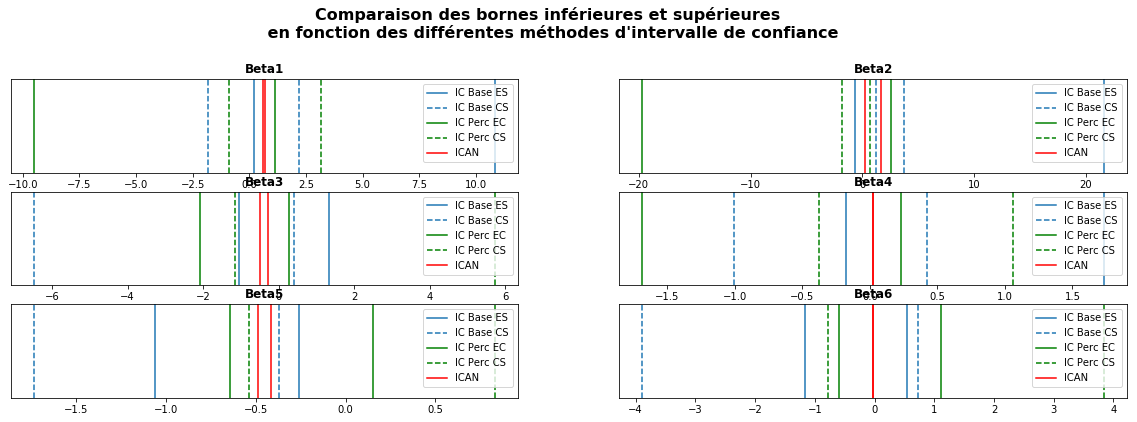

In [18]:
# A RAJOUTER: CASE SAMPLING AVEC DASH LINE
fig=plt.figure(figsize=(20,10))
plt.suptitle("Comparaison des bornes inférieures et supérieures \n en fonction des différentes méthodes d'intervalle de confiance",
           fontweight='bold',size=16)

for i in range(X_urine.shape[1]):
    ax=fig.add_subplot(5,2,i+1)
    #base ES
    base_ES=ax.axvline(IC_base_ES[i-1][0] ,label="IC Base ES")
    base_ES=ax.axvline(IC_base_ES[i-1][1] ,label="IC Base ES")
    #base CS
    base_CS=ax.axvline(IC_base_CS[i-1][0] ,label="IC Base CS",linestyle='dashed')
    base_CS=ax.axvline(IC_base_CS[i-1][1] ,label="IC Base CS",linestyle='dashed')
    #percentile ES
    perc_ES=ax.axvline(IC_perc_ES[i-1][0] ,color='green',label="IC Perc EC")
    perc_ES=ax.axvline(IC_perc_ES[i-1][1] ,color='green',label="IC Perc EC")
    #percentile CS
    perc_CS=ax.axvline(IC_perc_CS[i-1][0] ,color='green',label="IC Perc CS",linestyle='dashed')
    perc_CS=ax.axvline(IC_perc_CS[i-1][1] ,color='green',label="IC Perc CS",linestyle='dashed')
    #ICAN
    ican=ax.axvline(ICAN_plot[i-1][0],color='red',label="ICAN")
    ican=ax.axvline(ICAN_plot[i-1][1],color='red',label="ICAN")
    plt.title("Beta"+str(i+1),fontweight='bold')
    plt.yticks([])
    plt.legend(handles=[base_ES,base_CS,perc_ES,perc_CS,ican])

plt.show()

Ici on constate que les différents intervalles de confiance  "s'entrecoupent moins" que dans le cas précédent. Encore une fois, les intervalles asymptotique normales semblent globalement plus ressérés. Enfin, la différence de performance Percentile/Basique Error Sampling/Case sampling varie d'un paramètre à l'autre

## Tests par Bootstrap

### Dataset cars

#### Error Sampling

In [9]:
p_values_ES_cars=[]
for d in range(X_cars.shape[1]-1):
    gamma,Residus,X_H0,vrais = Res_lin.Estim_H0(k=d)
    p_values_ES_cars.append( Res_lin.bootstrap_H0_ES(k=d) )

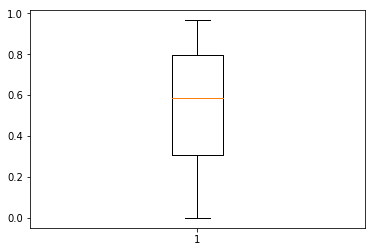

In [15]:
plt.boxplot(p_values_ES_cars[2])
plt.show()

#### Case Sampling

In [10]:
p_values_CS_cars=[]
for d in range(X_cars.shape[1]-1):
    gamma,Residus,X_H0,vrais = Res_lin.Estim_H0(k=d)
    p_values_CS_cars.append( Res_lin.bootstrap_H0_CS(k=d) )

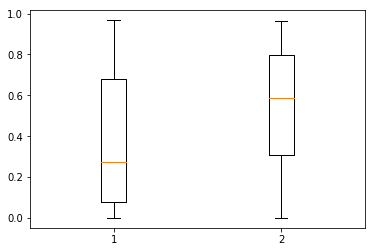

In [19]:
plt.boxplot([p_values_CS_cars[2],p_values_ES_cars[2]])
plt.show()

### Dataset Urine

In [18]:
gamma,Residus,X_H0,vrais = Res_log.Estim_H0(k=1)

In [19]:
F_list = Res_log.bootstrap_H0_ES(k=1)

/Users/antoinegrelety/Documents/ENSAE/S2_Bootstrap/Bootstrap-resampling-methods/resampling.py:161: RuntimeWarning: invalid value encountered in sqrt
  cutoff = pi_logreg / ( 1 + pi_logreg ) + np.sqrt(pi_logreg*(1-pi_logreg))*Residus[i]


In [21]:
np.mean(F_list)

0.49984269168943024

In [17]:
Res_log.p_value(F_list, -2*( Res_log.results.llf - vrais) )

1.0

## Sur simulations

In [53]:
# Définition des paramètres et des échantillons
n=50
p=5
beta_0=2
beta_1=2
beta_2=2
beta_3=0
beta_4=0
beta_5=0

X=np.zeros((n,p))
for k in range(n):
    for j in range(p):
        X[k][j]=npr.uniform(-0.5,0.5)
Y=np.zeros((n,1))
for k in range(n):
    Y[k]=beta_0+beta_1*X[k][0]+beta_2*X[k][1]+beta_3*X[k][2]+beta_4*X[k][3]+beta_5*beta_1*X[k][4]+npr.normal(0,1)